In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
%matplotlib inline

In [24]:
#Sample original input 
Sample_raw_x =128
Sample_raw_y =128

rpn_stride = 8 # 8 times downsampling

Feature_size_X = Sample_raw_x/rpn_stride
Feature_size_Y = Sample_raw_y/rpn_stride

scales = [1,2,4] # w and h len
ratios = [0.5,1,2] # 3 raitos



In [25]:
Feature_size_X

16.0

In [26]:
Sample_raw_x

128

In [51]:
def anchor(Feature_size_X, Feature_size_Y, rpn_stride, scales, ratios):
    #组合尺寸和比例 scale raitos
    scales,ratios = np.meshgrid(scales,ratios)
    scales,ratios = scales.flatten(), ratios.flatten()
    
    #计算anchor尺寸
    scalesX = scales * np.sqrt(ratios)  #宽度
    scalesY = scales / np.sqrt(ratios)  #长度
    
    #anchor point 映射
    ShiftX = np.arange(0,Feature_size_X) * rpn_stride
    ShiftY = np.arange(0,Feature_size_Y) * rpn_stride
    
    #anchor point在原图的位置
    ShiftX,ShiftY = np.meshgrid(ShiftX,ShiftY) #xy是anchor的中心点
    
    #每个anchor 点 上 需要有9个尺寸的anchor框
    centerX,anchorX = np.meshgrid(ShiftX,scalesX)
    centerY,anchorY = np.meshgrid(ShiftY,scalesY)
    print (centerX.shape)
    
    
    #Stack 各种尺寸， 各种比例 对应各种长度
    anchor_center = np.stack([centerY,centerX],axis=2).reshape(-1,2)
    anchor_size = np.stack([anchorY,anchorX],axis=2).reshape(-1,2)
    
    #左上 右下 的坐标点输出
    boxes = np.concatenate([anchor_center-0.5*anchor_size,anchor_center+0.5*anchor_size],axis=1)
    return boxes


In [52]:
anchors = anchor(Feature_size_X, Feature_size_Y, rpn_stride, scales, ratios)
anchors.shape

(9, 256)


(2304, 4)

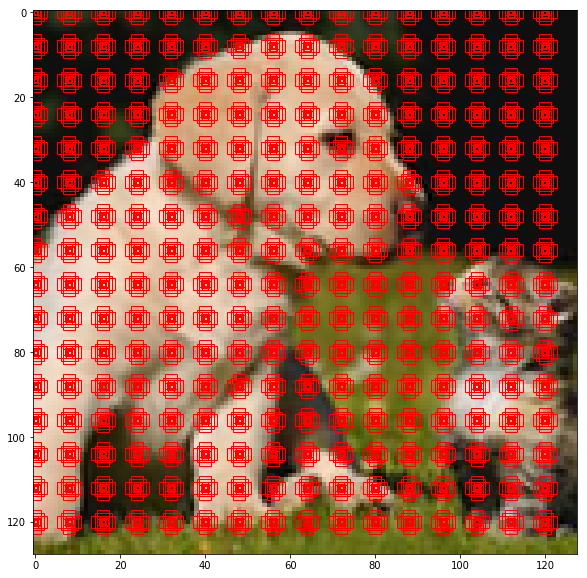

In [49]:
plt.figure(figsize=(10,10))
image = Image.open('test.jpg') #128 128 3
plt.imshow(image)

asx = plt.gca() #get current axs

for i in range(anchors.shape[0]):
    box = anchors[i]
    rec = patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],edgecolor='r',facecolor='none')
    asx.add_patch(rec)
 

In [53]:
#注意 2304是锚点的个数  是基于 featuremap的 总量计算出来的 x y 各等于16*16*9个锚框
16*16*9

2304